In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeTwoSym',
 'DejaVu Serif Display',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'cmex10',
 'cmr10',
 'STIXSizeFiveSym',
 'cmb10',
 'STIXSizeOneSym',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'cmmi10',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmss10',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'cmsy10',
 'DejaVu Serif',
 'cmtt10',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'Tahoma',
 'Microsoft PhagsPa',
 'Sylfaen',
 'Lucida Handwriting',
 'Cambria',
 'Book Antiqua',
 'Vladimir Script',
 'Calibri',
 'Palace Script MT',
 'Wingdings 3',
 'STKaiti',
 'Berlin Sans FB',
 'HancomEQN',
 'MS Reference Specialty',
 'NanumGothic',
 'Magic R',
 'Rockwell Condensed',
 'Playbill',
 'Bodoni MT',
 'Segoe Script',
 'Vivaldi

In [30]:
plt.rcParams['font.family'] = 'NanumGothic'

호선명을 입력하세요:  1호선


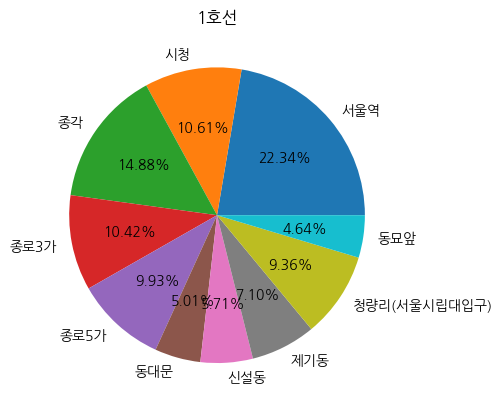

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 불러오기
df = pd.read_csv("subway_time.csv")
first_df = df.copy()

# 사용자 입력 받기
user_input = input("호선명을 입력하세요: ")

# 입력된 호선명에 해당하는 데이터만 선택
first_df = first_df[first_df['호선명'] == user_input]

# 2번째 행부터 마지막 행까지, 3번째 컬럼부터 마지막 컬럼까지 선택하여 데이터 타입을 정수로 변환
first_df.iloc[:, 2:] = first_df.iloc[:, 2:].astype(int)

# 각 행의 합계를 계산하여 '유동인구 총합'이라는 새로운 컬럼에 추가
first_df['유동인구 총합'] = first_df.iloc[:, 2:].sum(axis=1)

# 파이 차트 그리기
plt.pie(first_df['유동인구 총합'], labels=first_df['지하철역'], autopct='%0.2f%%')
plt.title(user_input)  # 호선명을 제목으로 설정
plt.show()  # 그래프 출력


비슷한 유동인구 비율 역을 알고 싶은 역을 입력하세요:  서울역
알고자 하는 호선을 선택하세요: ['1호선' '4호선' '경부선' '경의선' '공항철도 1호선']:  1호선


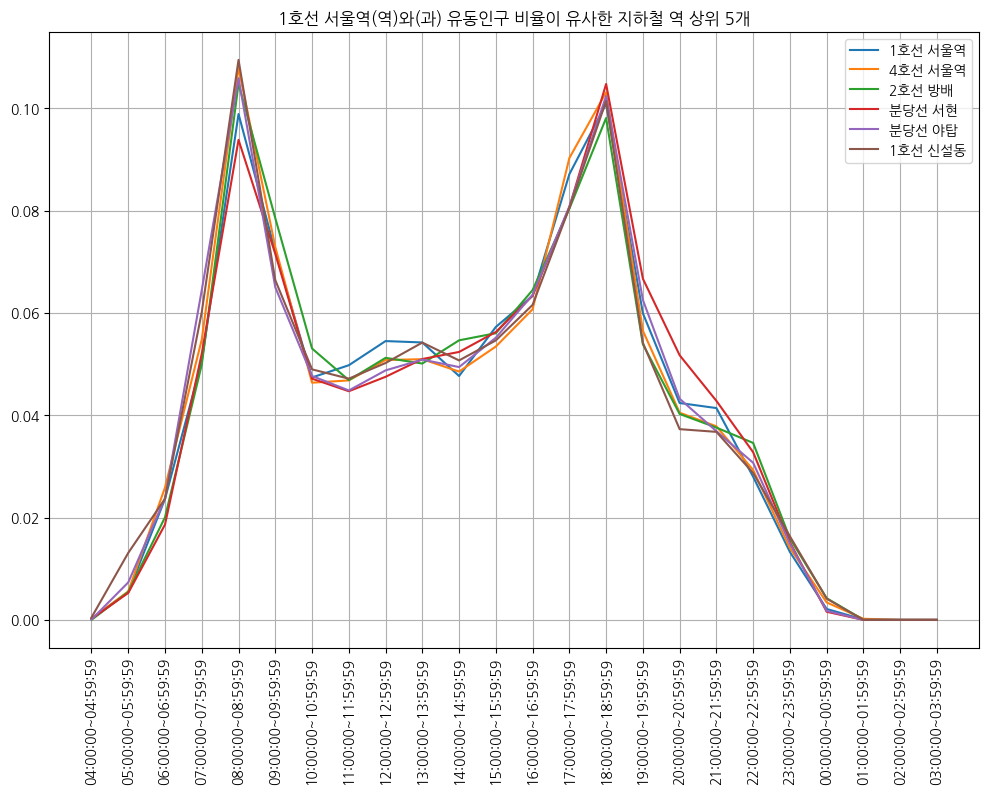

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 불러오기
df = pd.read_csv("subway_time.csv", encoding='utf-8')

# 사용자 입력 받기
user_station_input = input("비슷한 유동인구 비율 역을 알고 싶은 역을 입력하세요: ")

# 입력한 역이 속한 모든 호선을 찾기
lines = df[df['지하철역'] == user_station_input]['호선명'].unique()

# 여러 호선이 있다면, 사용자가 특정 호선을 입력
if len(lines) > 1:
    user_line_input = input("알고자 하는 호선을 선택하세요: " + str(lines) + ": ")
else:
    user_line_input = lines[0]  # 호선이 하나뿐이라면 자동으로 선택

# 데이터프레임 복사하고 데이터 유형 변환
second_df = df.copy()
second_df1 = second_df.iloc[1:, 2:].astype(int)

sum_people = pd.DataFrame()

temp = 0
count = 1

for i in range(48):
    if i % 2 == 1:
        sum_people[str(count)] = temp + second_df1.iloc[:, i]
        count += 1
    else:
        temp = second_df1.iloc[:, i]

row_sum = sum_people.sum(axis=1)

# 유동인구 비율 계산
proportion = pd.DataFrame()

for i in range(24):
    proportion[str(i)] = sum_people.iloc[:, i] / row_sum

# 기준 역의 인덱스 찾기
selected_station_count = int(second_df[(second_df['호선명'] == user_line_input) & (second_df['지하철역'] == user_station_input)].index[0]) - 1

# 기준 행 선택
selected_row = proportion.iloc[selected_station_count]

# 각 행에 대해 기준 행과의 차이 계산
differences = (proportion.sub(selected_row, axis=1) ** 2).sum(axis=1)


# 차이를 오름차순으로 정렬하고 상위 5개 인덱스 선택
most_similar_indices = differences.nsmallest(6).index  # 자신 포함 6개 선택 (자신 포함 상위 6개를 선택하여 첫 번째는 자신을 제외)



# 시간대 설정
time_ranges = ['04:00:00~04:59:59', '05:00:00~05:59:59', '06:00:00~06:59:59', '07:00:00~07:59:59',
               '08:00:00~08:59:59', '09:00:00~09:59:59', '10:00:00~10:59:59', '11:00:00~11:59:59',
               '12:00:00~12:59:59', '13:00:00~13:59:59', '14:00:00~14:59:59', '15:00:00~15:59:59',
               '16:00:00~16:59:59', '17:00:00~17:59:59', '18:00:00~18:59:59', '19:00:00~19:59:59',
               '20:00:00~20:59:59', '21:00:00~21:59:59', '22:00:00~22:59:59', '23:00:00~23:59:59',
               '00:00:00~00:59:59', '01:00:00~01:59:59', '02:00:00~02:59:59', '03:00:00~03:59:59']

# 시각화
plt.figure(figsize=(12, 8))

for k in most_similar_indices:
    station_name = df.iloc[k + 1-1]['지하철역']
    line_name = df.iloc[k + 1-1]['호선명']
    plt.plot(time_ranges, proportion.iloc[k-1], label=f"{line_name} {station_name}")

plt.title(f'{user_line_input} {user_station_input}(역)와(과) 유동인구 비율이 유사한 지하철 역 상위 5개')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)  # x축 눈금 라벨 회전
plt.show()


In [33]:
df = pd.read_csv("subway_time.csv", encoding='utf-8')

third_df=df.copy()
third_df2=df.copy()

# 데이터프레임의 첫 번째 열을 지하철역 열로 지정
df.set_index(df.columns[1], inplace=True)

# 첫 번째 데이터프레임 수정
enter_df = third_df.iloc[1:, 2::2].astype(int)
enter_df.index = third_df.iloc[1:, 1]  # 지하철역 열을 인덱스로 설정
enter_combined = enter_df.groupby(enter_df.index).sum()  # 같은 역 이름을 가진 호선의 승하차 값을 합산

# 두 번째 데이터프레임 수정
exit_df = third_df2.iloc[1:, 3::2].astype(int)
exit_df.index = third_df2.iloc[1:, 1]  # 지하철역 열을 인덱스로 설정
exit_combined = exit_df.groupby(exit_df.index).sum()  # 같은 역 이름을 가진 호선의 승하차 값을 합산

# 베드타운 평균 비율 계산
rowsum = enter_combined.sum(axis=1)
foursum = enter_combined.iloc[:, 2:6].sum(axis=1)
badtown_percent = foursum.div(rowsum, axis=0).astype(float)

rowsum2 = exit_combined.sum(axis=1)
foursum2 = exit_combined.iloc[:, 13:17].sum(axis=1)
badtown_percent2 = foursum2.div(rowsum2, axis=0).astype(float)

bad_town_final = (badtown_percent + badtown_percent2) / 2

# 내림차순으로 정렬 후 상위 3개 값을 출력
top_3_values = bad_town_final.sort_values(ascending=False).head(3)
top_3_values_with_station = pd.DataFrame({'베드타운(목록&비율)': top_3_values.values}, index=top_3_values.index)
print(top_3_values_with_station)
print("dtype:", top_3_values_with_station['베드타운(목록&비율)'].dtype)
print('\n')

# 기업단지 평균 비율 계산
foursum3 = enter_combined.iloc[:, 13:17].sum(axis=1)
corporate_percent = foursum3.div(rowsum, axis=0).astype(float)

foursum4 = exit_combined.iloc[:, 2:6].sum(axis=1)
corporate_percent2 = foursum4.div(rowsum2, axis=0).astype(float)

corporate_final2 = (corporate_percent + corporate_percent2) / 2

# 내림차순으로 정렬 후 상위 3개 값을 출력
top_3_values2 = corporate_final2.sort_values(ascending=False).head(3)
top_3_values2_with_station = pd.DataFrame({'기업단지(목록&비율)': top_3_values2.values}, index=top_3_values2.index)
print(top_3_values2_with_station)
print("dtype:", top_3_values2_with_station['기업단지(목록&비율)'].dtype)


      베드타운(목록&비율)
지하철역             
삼동       0.518713
강매       0.516872
계양       0.514441
dtype: float64


         기업단지(목록&비율)
지하철역                
남동인더스파크     0.640829
가산디지털단지     0.598023
공항화물청사      0.573389
dtype: float64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("subway_time.csv", encoding='utf-8')

# 사용자 입력 받기
s_people = input("비슷한 유동인구 비율 역을 알고 싶은 역을 입력하세요: ")

# 입력한 역이 속한 호선 찾기
lines = df[df['지하철역'] == s_people]['호선명'].unique()

# 호선 선택
if len(lines) > 1:
    line_input = input(f"알고자 하는 호선을 선택하세요: {lines}: ")
else:
    line_input = lines[0]

# 데이터 전처리
second_df = df.copy()
second_df.iloc[1:, 2:] = second_df.iloc[1:, 2:].astype(int)

# 시간대별 유동인구 합산
time_columns = second_df.columns[2:]
sum_people = second_df[time_columns].groupby(np.arange(len(time_columns)) // 2, axis=1).sum()
row_sum = sum_people.sum(axis=1)

# 유동인구 비율 계산
proportion = sum_people.div(row_sum, axis=0)

# 기준 역 인덱스 찾기
selected_station_count = df[(df['호선명'] == line_input) & (df['지하철역'] == s_people)].index[0]

# 기준 행 선택
selected_row = proportion.iloc[selected_station_count]

# 차이 계산
differences = proportion.apply(lambda row: np.sum((row - selected_row) ** 2), axis=1)

# 유사한 역 찾기
similar_indices = differences.nsmallest(6).index

# 꺾은선 그래프 x축 레이블 설정
time_ranges = ['04:00:00~04:59:59', '05:00:00~05:59:59', '06:00:00~06:59:59', '07:00:00~07:59:59',
               '08:00:00~08:59:59', '09:00:00~09:59:59', '10:00:00~10:59:59', '11:00:00~11:59:59',
               '12:00:00~12:59:59', '13:00:00~13:59:59', '14:00:00~14:59:59', '15:00:00~15:59:59',
               '16:00:00~16:59:59', '17:00:00~17:59:59', '18:00:00~18:59:59', '19:00:00~19:59:59',
               '20:00:00~20:59:59', '21:00:00~21:59:59', '22:00:00~22:59:59', '23:00:00~23:59:59',
               '00:00:00~00:59:59', '01:00:00~01:59:59', '02:00:00~02:59:59', '03:00:00~03:59:59']

plt.figure(figsize=(12, 8))

for idx in similar_indices[1:]:  # 자신 제외
    station_name = df.iloc[idx]['지하철역']
    line_name = df.iloc[idx]['호선명']
    plt.plot(time_ranges, proportion.iloc[idx], label=f"{line_name} {station_name}")

plt.title(f'{line_input} {s_people}(역)와(과) 유동인구 비율이 유사한 지하철 역 상위 5개')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)  # x축 눈금 라벨 회전
plt.show()


비슷한 유동인구 비율 역을 알고 싶은 역을 입력하세요:  서울역
알고자 하는 호선을 선택하세요: ['1호선' '4호선' '경부선' '경의선' '공항철도 1호선']:  1호선


C:\Users\pdhjs\AppData\Local\Temp\ipykernel_30756\4237991443.py:26: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sum_people = second_df[time_columns].groupby(np.arange(len(time_columns)) // 2, axis=1).sum()


TypeError: unsupported operand type(s) for /: 'str' and 'str'